<a href="https://colab.research.google.com/github/Vhooker/stc510-Mod3/blob/main/Module3_crimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 3 crime data goals-

1. Understand where types of crimes are happening.
2. Understand where crime rates are going up and down.
3. Group crimes by violent and non-violent look at crimes over time.

Importing Pandas to work with dataframes and my data set is opened as "crimes"

In [86]:
import pandas as pd
crimes = pd.read_csv('/content/crimestat.csv', index_col='INC_NUMBER')

<ipython-input-86-7cce678fcd26>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes = pd.read_csv('/content/crimestat.csv', index_col='INC_NUMBER')


Checking the coulmns and how many unique data points are in each.

In [ ]:
crimes

Make a not so pretty graph and leave it in because it's kinda pretty.

<Axes: ylabel='ZIP'>

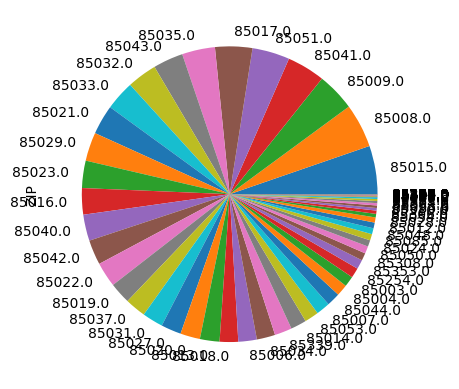

In [87]:
crimes.ZIP.value_counts().plot.pie()

Sorting values and using value count to understand data

In [ ]:
crimes.sort_values(by=['ZIP','UCR_CRIME_CATEGORY'])

In [ ]:
crimes.UCR_CRIME_CATEGORY.value_counts()

Will being looking at Types of crime and where they are happening. By looking at the ZIP column in relation to other columns use- groupby

In [90]:
crimearea = crimes.groupby(['ZIP'])

In [91]:
crimearea.OCCURRED_ON.value_counts()

ZIP      OCCURRED_ON     
85003.0  1/1/2016 0:00       2
         1/1/2017 0:00       2
         1/17/2017 0:00      2
         1/20/2016 15:42     2
         10/14/2017 7:00     2
                            ..
85395.0  2/5/2016 16:15      1
85396.0  10/14/2017 19:00    1
         7/17/2017 11:21     1
         8/10/2017 17:00     1
         8/23/2017 0:00      1
Name: OCCURRED_ON, Length: 127743, dtype: int64

Adjust format of date to datetime so I can convert it to yyyy. This should make it easier to see trends.

In [92]:
crimes.OCCURRED_ON = pd.to_datetime(crimes.OCCURRED_ON, format="%m/%d/%Y %H:%M")

Adding date column with year.

In [143]:
crimes['Date'] = crimes['OCCURRED_ON'].dt.strftime('%Y')

In [144]:
type(crimearea)

pandas.core.groupby.generic.DataFrameGroupBy

Displaying data set with crimes by location with number of occurances.

In [95]:
crimearea[['UCR_CRIME_CATEGORY','month_year_column']].value_counts()

ZIP      UCR_CRIME_CATEGORY   month_year_column
85003.0  LARCENY-THEFT        2017                 356
                              2016                 322
         DRUG OFFENSE         2016                  96
                              2017                  88
         BURGLARY             2017                  81
                                                  ... 
85395.0  AGGRAVATED ASSAULT   2016                   1
         RAPE                 2016                   1
85396.0  LARCENY-THEFT        2017                   2
         BURGLARY             2017                   1
         MOTOR VEHICLE THEFT  2017                   1
Length: 1379, dtype: int64

creating "crimefacts" to save a csv

In [96]:
crimefacts = crimearea[['UCR_CRIME_CATEGORY','month_year_column']].value_counts()

In [97]:
crimefacts.to_csv('crimesareaovertime.csv')

Opened CSV to edit column headers and saved changes.

In [98]:
crimetime = pd.read_csv('/content/crimesareaovertime.csv')

In [99]:
crimetime.rename(columns={'0': 'occurrances_per_year'}, inplace= True)

In [100]:
crimetime.rename(columns={'month_year_column': 'year'}, inplace= True)

In [101]:
crimetime.to_csv('crimesareaovertime.csv')

Goal- Understand Violent crimens vs nonviolent crimes.

Begin by creating a selective search for each group of crimes.

In [102]:
violentcrimes = crimes[(crimes.UCR_CRIME_CATEGORY== 'AGGRAVATED ASSAULT') | (crimes.UCR_CRIME_CATEGORY== 'ROBBERY') | (crimes.UCR_CRIME_CATEGORY== 'RAPE') | (crimes.UCR_CRIME_CATEGORY== 'ARSON') | (crimes.UCR_CRIME_CATEGORY== 'MURDER AND NON-NEGLIGENT MANSLAUGHTER')]

In [103]:
nonviolentcrime = crimes[(crimes.UCR_CRIME_CATEGORY== 'BURGLARY') | (crimes.UCR_CRIME_CATEGORY== 'DRUG OFFENSE') | (crimes.UCR_CRIME_CATEGORY== 'LARCENY-THEFT') | (crimes.UCR_CRIME_CATEGORY== 'MOTOR VEHICLE THEFT')]

In [104]:
type(nonviolentcrime)

pandas.core.frame.DataFrame

Compare the violent crime occurances over each year

In [105]:
violentcrimes.month_year_column.value_counts(ascending=True)

2015    1151
2016    8028
2017    8616
Name: month_year_column, dtype: int64

Compare the nonviolent crime occurances over each year.

In [106]:
nonviolentcrime.month_year_column.value_counts()[['2015','2016','2017']]

2015     8973
2016    55198
2017    49395
Name: month_year_column, dtype: int64

Save non-violent crime data as csv to work with as a data frame.

In [107]:
vvnvcrime= nonviolentcrime.month_year_column.value_counts()[['2015','2016','2017']]

In [108]:
vvnvcrime.to_csv('violentvsnonviolent.csv')

Open CSV as a dataframe to change column headers and add violent crime data.

In [110]:
violenttime = pd.read_csv('/content/violentvsnonviolent.csv')

In [111]:
violenttime.rename(columns={'Unnamed: 0':'Year'}, inplace= True)


Added violent crime data manually.

In [112]:
violenttime['Violent Crime per year'] = ['1151','8028','8616']

Saved changes.

In [113]:
violenttime.to_csv('violentvsnonviolent.csv')

Goal- To understand changes in crime over time by using mean calculation. If crime average is in 2015 crime has gone down. If crime average is in 2017 crime has gone up and if it is in 2016 it is the same.

Used agg to see average date of crimes.

In [114]:
crimearea.OCCURRED_ON.agg(['mean'])

,mean
ZIP,
85003.0,2016-11-29 05:01:11.078755840
85004.0,2016-11-16 18:53:58.613981696
85006.0,2016-11-25 07:28:01.469480192
85007.0,2016-11-13 06:30:00.360721664
85008.0,2016-11-23 06:45:05.374128128
...,...
85382.0,2016-04-11 16:22:30.000000000
85383.0,2017-04-23 04:54:30.000000000
85392.0,2016-12-16 02:19:37.500000000


Saved as csv and opened so I can work with it as a dataframe

In [155]:
crimerates= crimearea.OCCURRED_ON.agg(['mean'])
crimerates.to_csv('Crimerates.csv')

In [158]:
crimerate=  pd.read_csv('/content/Crimerates.csv')

Convert time format from str to datetime

In [181]:
crimerate['mean'] = pd.to_datetime(crimerate['mean'], format='%Y-%m-%d')

create conditional column that reads the "mean' column from the dataframe and applys the status of "increased" "Decreased" or "No Change" based on the data.

In [182]:
crimerate['Crime rate status'] = crimerate['mean'].apply(lambda x: 'increased' if x > pd.Timestamp('2016-12-31') else ('decreased' if x < pd.Timestamp('2016-01-01') else 'no change'))

saved and done :)

In [184]:
crimerate.to_csv('Crimerates.csv')